In [1]:
from misc import *
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau, MultiStepLR

%load_ext autoreload
%autoreload 2
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Parameters for loading the .mat file
data_dir = "C:/Users/Mircea/Google Drive/Data/nn-dipole-fitting/"
path_train = data_dir + "Clean Dataset Short.mat"

In [2]:
# Read the training and validation data 
data_train, data_valid = read_train_data(path_train)

In [3]:
# Define parameters
batch_size = 2500
n_epochs = 50
sizes = [data_train["n_chan"],2048,1024,512,256,3]

device = check_cuda()

CUDA is available!  Training on GPU ...
Using GeForce RTX 2070


If the model exists, trained for the specified number of epochs, we won't do the training again.

50 epochs ready in 553.199 seconds. Minimum validation loss: 1.264863
Train batch time: 0.01378 ± 0.00066 seconds
Valid batch time: 0.00362 ± 0.00012 seconds


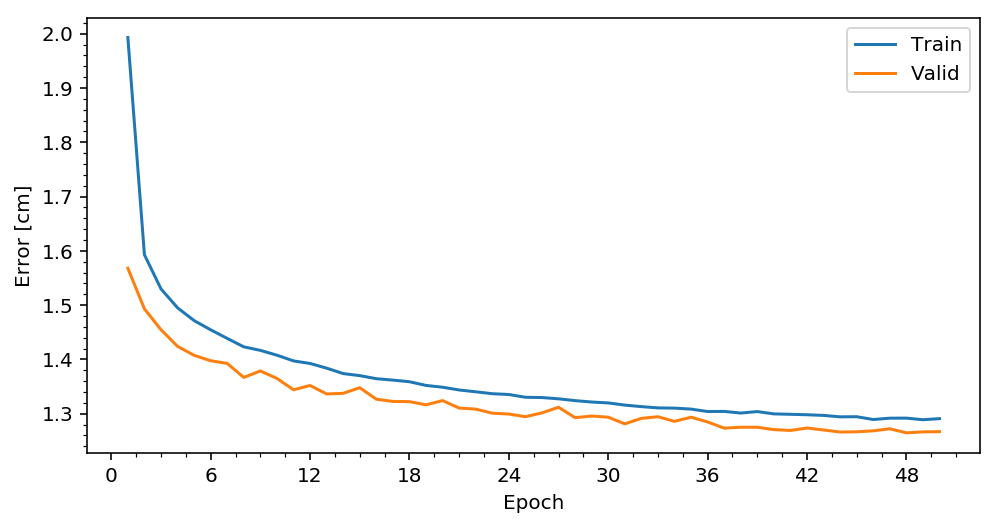

In [4]:
# Define the path to the model
path_model = get_model_name(useful_paths["trained"],sizes,n_epochs)
# Check if it already exists
if os.path.isfile(path_model):
    model, train_loss, valid_loss = load_model(path_model)
else:
    # If not, train a new model
    from misc import dipfit
    model = dipfit(sizes=sizes, batchnorm=True)
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(),3e-4) 
    lr_scheduler = ReduceLROnPlateau(optimizer, verbose=True, factor=0.5)
    model, train_loss, valid_loss = train(model, data_train, data_valid, n_epochs, batch_size, device,
                                          optimizer, lr_scheduler=lr_scheduler, show_every=1)    

In [5]:
# What if we interrupted by keyboard?
path_model = get_model_name(useful_paths["trained"],sizes,len(train_loss))
save_model(model,train_loss,valid_loss,path_model)